## 1.4

   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   
5     1  1926      0.660817      0.599880  156881.657475  0.211467   
6     1  1927      0.936179      0.648268  184993.598374  0.264321   
7     1  1928      0.938617      0.534288  214827.906423  0.207948   
8     1  1929      0.601427      0.647670  168999.412815  0.241801   
9     1  1930      0.936715      0.518176  195150.285343  0.333524   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.53

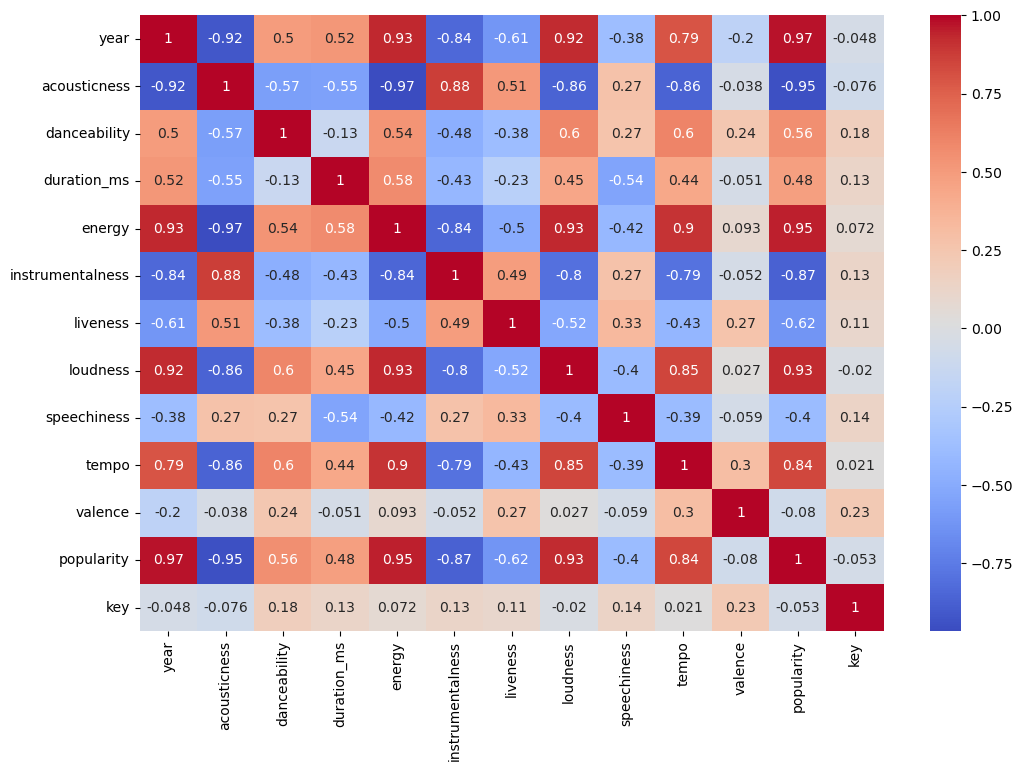

artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object
                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.653
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                          2.147e+05
Date:                Sun, 22 Sep 2024   Prob (F-statistic):                        0.00
Time:         

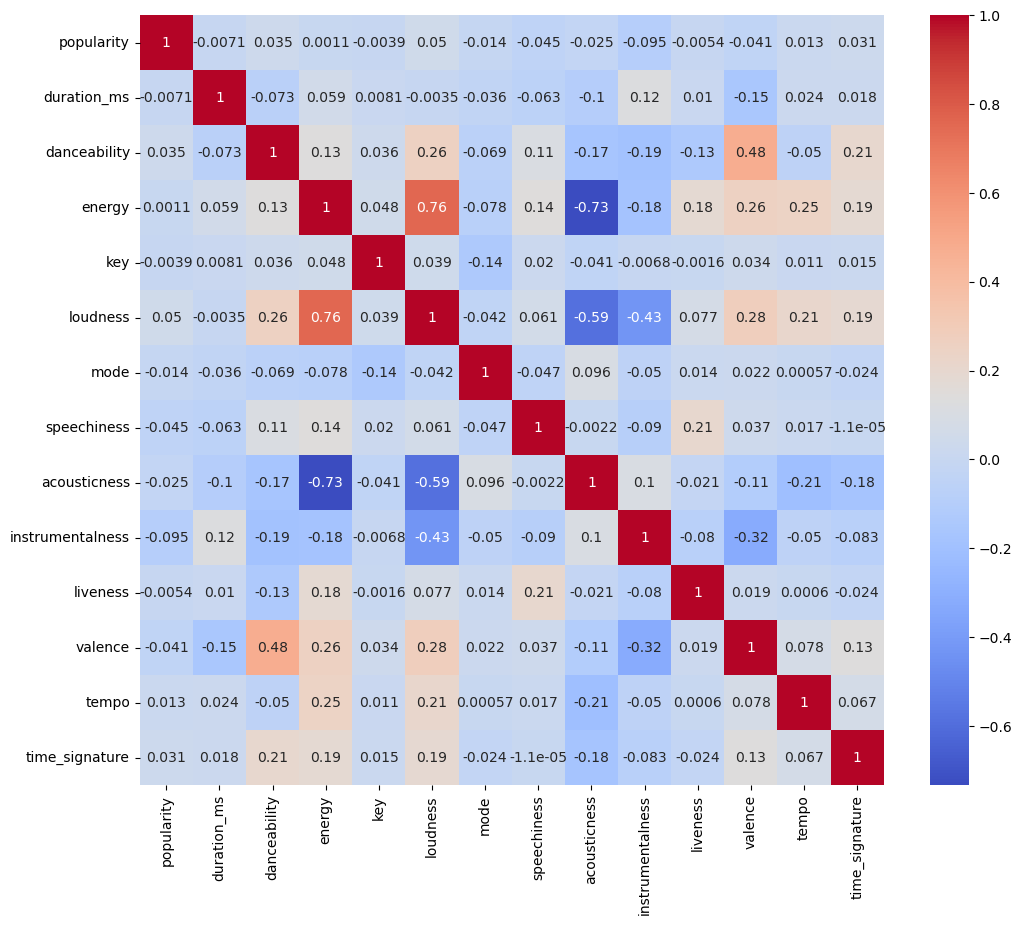

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasetSmall = pd.read_csv("data_by_year_o.csv")
datasetLarge = pd.read_csv("dataset.csv.zip")

print(datasetSmall.head(10))
print(datasetLarge.head(10))

print(datasetSmall.describe())
print(datasetLarge.describe())

datasetSmall.drop(columns=['mode'], inplace=True)
datasetLarge.drop(columns=['Unnamed: 0', 'track_id'], inplace = True)

import statsmodels.api as sm

Xsmall= datasetSmall['tempo']
ySmall = datasetSmall['popularity']

model = sm.OLS(ySmall, Xsmall).fit()
print(model.summary())

corrMatrixSmall = datasetSmall.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrMatrixSmall, annot = True, cmap = 'coolwarm')
plt.show()

print(datasetLarge.dtypes)
# toCategoricalCols = datasetLarge.dtypes[(datasetLarge.dtypes == 'object') | (datasetLarge.dtypes == 'bool')].index.to_list()
# for col in toCategoricalCols:
#     datasetLarge[col] = datasetLarge[col].astype('category')
# datasetLargeEncoded = pd.get_dummies(datasetLarge, columns = toCategoricalCols, drop_first=True)

Xlarge = datasetLarge['tempo']
yLarge = datasetLarge['popularity']

model = sm.OLS(yLarge, Xlarge).fit()
print(model.summary())

# corrMatrixLarge = datasetLargeEncoded.corr()

corrMatrixLarge = datasetLarge.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corrMatrixLarge, annot = True, cmap = 'coolwarm')
plt.show()





